### 0) INTRODUCTION AND SUMMARY

> The goal of the analysis is to show a *snapshot* of the sentiment division around Tesla and Elon Musk for a certain timeframe. Tweets from different places around the globe will be shown in an interactive map, with a color code indicating sentiment polarity.

> All tweets were streamed from Twitter API using tweepy. A filter based on three keywords was defined for the streaming (see streaming_tweets.py for more info). 

> A custom StreamListener was coded, filtering out retweets and selecting the desired tweet object properties.
> Tweets were stored in real-time into a database using SQLite.

> From there, the table was exported into a dataframe for further manipulation.

> Several cleaning tasks had to be performed :

> - Cleaning text for sentiment analysis algorithm
    
> - Dropping undesired columns, dealing with missing values and changing datatypes
    
> - Converting user_location into coordinates using geopy
    
> After the cleaning process, a sentiment analysis algorithm was apply to the tweets' text in order to extract polarity.

> Finally, the visualization was created using sentiment and coordinates.

### 1 ) Query SQlite Database and create dataframe

In [1]:
import os

# Import libraries for data structure manipulation
import pandas as pd
import numpy as np

#Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import packages for retreaving data
import dataset
import init_settings

# For cleaning purposes
import re
import string

from textblob import TextBlob

In [2]:
# Query database and extract to dataframe
df_tweets = pd.read_sql('SELECT * FROM tweets', init_settings.CONNECTION_STRING).drop('id', axis=1)
# Export dataframe to csv file
df_tweets.to_csv(init_settings.CSV_NAME)
df_tweets.head()

,user_description,followers_count,user_location,coordinates,geoloc,text,user_name,user_created,id_str,created,retweet_count
0,None,183,None,None,None,@CarlosDG100D @SebasFC @joseluisportela Trampa...,FernandoNaend2,2012-04-27 20:52:13.000000,1262339808694845446,2020-05-18 11:10:38.000000,0
1,"Dad, Husband, Veteran, Retired international b...",8751,Texas/SE Asia,None,None,Elon Musk stirs the pot with cryptic 'red pill...,lonestarmango,2011-01-15 18:44:13.000000,1262339855649927168,2020-05-18 11:10:49.000000,0
2,Do not glorify us. WE are ALL Patriots. Honor ...,1830,United States,None,None,@elonmusk [They] have to tell us the truth htt...,NostradaChris,2018-06-04 01:36:22.000000,1262339865577955329,2020-05-18 11:10:51.000000,0
3,"First Responder, Author, Empath, featured in s...",423,"Florida, USA",None,None,How about the dinosaur killers stop parking in...,beebalmtraveler,2013-01-23 18:20:17.000000,1262339876835508228,2020-05-18 11:10:54.000000,0
4,Best news from all over India under one portal...,130,India,None,None,"Panasonic sees strong demand from Tesla, in ta...",TheNewsOfIndia3,2020-01-24 07:16:54.000000,1262339878873894913,2020-05-18 11:10:54.000000,0


### 2) Clean and assess master dataframe

In [3]:
df_tweets.info()
df_tweets.head(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_description  135 non-null    object
 1   followers_count   152 non-null    int64 
 2   user_location     99 non-null     object
 3   coordinates       0 non-null      object
 4   geoloc            0 non-null      object
 5   text              152 non-null    object
 6   user_name         152 non-null    object
 7   user_created      152 non-null    object
 8   id_str            152 non-null    object
 9   created           152 non-null    object
 10  retweet_count     152 non-null    int64 
dtypes: int64(2), object(9)
memory usage: 13.2+ KB


,user_description,followers_count,user_location,coordinates,geoloc,text,user_name,user_created,id_str,created,retweet_count
0,None,183,None,None,None,@CarlosDG100D @SebasFC @joseluisportela Trampa...,FernandoNaend2,2012-04-27 20:52:13.000000,1262339808694845446,2020-05-18 11:10:38.000000,0
1,"Dad, Husband, Veteran, Retired international b...",8751,Texas/SE Asia,None,None,Elon Musk stirs the pot with cryptic 'red pill...,lonestarmango,2011-01-15 18:44:13.000000,1262339855649927168,2020-05-18 11:10:49.000000,0
2,Do not glorify us. WE are ALL Patriots. Honor ...,1830,United States,None,None,@elonmusk [They] have to tell us the truth htt...,NostradaChris,2018-06-04 01:36:22.000000,1262339865577955329,2020-05-18 11:10:51.000000,0
3,"First Responder, Author, Empath, featured in s...",423,"Florida, USA",None,None,How about the dinosaur killers stop parking in...,beebalmtraveler,2013-01-23 18:20:17.000000,1262339876835508228,2020-05-18 11:10:54.000000,0
4,Best news from all over India under one portal...,130,India,None,None,"Panasonic sees strong demand from Tesla, in ta...",TheNewsOfIndia3,2020-01-24 07:16:54.000000,1262339878873894913,2020-05-18 11:10:54.000000,0
5,『この地球でジブンの人生という実験を』 ▼コンディショニングトレーナー（*NASM-PES ...,1012,🌐Earth （🇯🇵Hiroshima→Tokyo）,None,None,まさに👽\n日本でもマイクロチップが始まる。\n僕も昨年から順番待ち…\nイーロンが発表した...,ryyyosako4,2013-05-06 00:30:31.000000,1262339886469668864,2020-05-18 11:10:56.000000,0
6,"Quick, small, and consistent gains\nTweets are...",4443,"Toronto, Ontario",None,None,$spy $gspc $aapl $nflx $goog $tsla Aurora Cann...,FaisamTrader,2014-10-20 01:22:48.000000,1262339890676711425,2020-05-18 11:10:57.000000,0
7,Ikigai. UPD Chemical Engineer Ng/Para Sa Bayan...,9176,Philippines,None,None,Used to adore elon musk but so many reasons no...,angelicaaira,2009-05-08 14:17:38.000000,1262339891335065601,2020-05-18 11:10:57.000000,0
8,"Quick, small, and consistent gains\nTweets are...",4443,"Toronto, Ontario",None,None,$spy $gspc $aapl $nflx $goog $tsla Internation...,FaisamTrader,2014-10-20 01:22:48.000000,1262339895131021312,2020-05-18 11:10:58.000000,0
9,Каждый проект — в первую очередь клубок социал...,284,"Саратов, Россия",None,None,Американскому заводу Tesla разрешили работать ...,ckerAmick,2013-12-19 16:43:42.000000,1262339911920779266,2020-05-18 11:11:02.000000,0


#### Issues in data
> 1- Remove punctuation, lowercase letters, emojis, hashtag, @, http links, RT, and other weird signs.

> 2 - Drop Columns that will not be used.

> 3- Created and user created data type is object instead of timestamp.

> 4- Multiple missing values in follower_count

> 5- Clean locations.

##### 1- Remove punctuation, emojis, hastags, @, http links, RT and make text lowercase.

In [4]:
# Clean text in dataframe
def clean_text(text):
    text = text.lower() # make all text lowercase
    text = re.sub('\w*\d\w*', '', text) # remove digits
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # get rid of punctuations
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    text = re.sub(emoji_pattern, '', text) # remove emojis
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove @
    text = re.sub(r'#', '', text) # remove hastags
    text = re.sub(r'https:\/\/\S+', '', text) # removes http:// links
    text = re.sub(r'http:\/\/\S+', '', text) # removes http:// links
    text = re.sub(r'rt[\s]+', '', text) # remove RT
    text = re.sub('\n', '', text) #
    return text

df_tweets_clean = df_tweets.copy()
df_tweets_clean['text'] = df_tweets_clean['text'].apply(clean_text)

In [5]:
# Dirty text
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df_tweets['text'])

0      @CarlosDG100D @SebasFC @joseluisportela Trampa...
1      Elon Musk stirs the pot with cryptic 'red pill...
2      @elonmusk [They] have to tell us the truth htt...
3      How about the dinosaur killers stop parking in...
4      Panasonic sees strong demand from Tesla, in ta...
5      まさに👽\n日本でもマイクロチップが始まる。\n僕も昨年から順番待ち…\nイーロンが発表した...
6      $spy $gspc $aapl $nflx $goog $tsla Aurora Cann...
7      Used to adore elon musk but so many reasons no...
8      $spy $gspc $aapl $nflx $goog $tsla Internation...
9      Американскому заводу Tesla разрешили работать ...
10     elon musk dünya yaşanılmaz hale geliyor bırak ...
11     Panasonic sees strong demand from Tesla, in ta...
12     @elonmusk I love the Tesla car but now hate Mu...
13     @gazetadopovo É sério isso?! Que legal, o Mand...
14     @elonmusk @ChillMichelle @Tesla @elonmusk don’...
15     Elon Musk is like the Seth MacFarlene of science.
16     @chrisklomp @LMeulebroek @marcodegekste1 😂😂😂😂😂...
17     @jimcramer Tesla +up 23 

In [6]:
# Clean text
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_tweets_clean['text'])

0       sebasfc joseluisportela trampas al solitariol...
1      elon musk stirs the pot with cryptic red pill ...
2       elonmusk they have to tell us the truth httpstco
3      how about the dinosaur killers stop parking in...
4      panasonic sees strong demand from tesla in tal...
5      まさに日本でもマイクロチップが始まる。僕も昨年から順番待ち…イーロンが発表した昨年のneur...
6      spy gspc aapl nflx goog tsla aurora cannabis r...
7      used to adore elon musk but so many reasons no...
8      spy gspc aapl nflx goog tsla international gam...
9      американскому заводу tesla разрешили работать ...
10     elon musk dünya yaşanılmaz hale geliyor bırak ...
11     panasonic sees strong demand from tesla in tal...
12     elonmusk i love the tesla car but now hate mus...
13     gazetadopovo é sério isso que legal o mandetta...
14     elonmusk chillmichelle tesla elonmusk don’t ru...
15      elon musk is like the seth macfarlene of science
16     chrisklomp lmeulebroek   te laat chris of is e...
17     jimcramer tesla up  poin

##### 2- Drop columns

In [7]:
columns_todrop = ['retweet_count', 'user_description', 'id_str', 'geoloc', 'coordinates']
df_tweets_clean.drop(columns_todrop, axis=1, inplace= True)

In [8]:
df_tweets_clean.info()
df_tweets_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   followers_count  152 non-null    int64 
 1   user_location    99 non-null     object
 2   text             152 non-null    object
 3   user_name        152 non-null    object
 4   user_created     152 non-null    object
 5   created          152 non-null    object
dtypes: int64(1), object(5)
memory usage: 7.2+ KB


,followers_count,user_location,text,user_name,user_created,created
0,183,None,sebasfc joseluisportela trampas al solitariol...,FernandoNaend2,2012-04-27 20:52:13.000000,2020-05-18 11:10:38.000000
1,8751,Texas/SE Asia,elon musk stirs the pot with cryptic red pill ...,lonestarmango,2011-01-15 18:44:13.000000,2020-05-18 11:10:49.000000
2,1830,United States,elonmusk they have to tell us the truth httpstco,NostradaChris,2018-06-04 01:36:22.000000,2020-05-18 11:10:51.000000
3,423,"Florida, USA",how about the dinosaur killers stop parking in...,beebalmtraveler,2013-01-23 18:20:17.000000,2020-05-18 11:10:54.000000
4,130,India,panasonic sees strong demand from tesla in tal...,TheNewsOfIndia3,2020-01-24 07:16:54.000000,2020-05-18 11:10:54.000000


##### 3- Change datatype of user_created and created

In [9]:
df_tweets_clean['user_created'] = pd.to_datetime(df_tweets_clean['user_created'])
df_tweets_clean['created'] = pd.to_datetime(df_tweets_clean['created'])

In [10]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   followers_count  152 non-null    int64         
 1   user_location    99 non-null     object        
 2   text             152 non-null    object        
 3   user_name        152 non-null    object        
 4   user_created     152 non-null    datetime64[ns]
 5   created          152 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 7.2+ KB


##### 4- Deal with missing values for followers_count
> In case there are NaN values in the follower_count column, there will be substituted by the median for all tweets.

In [11]:
df_tweets_clean.describe()

,followers_count
count,152.000000
mean,15652.796053
std,89015.824646
min,0.000000
25%,94.750000
50%,401.000000
75%,4443.000000
max,851818.000000


Since the data has a huge dispersion, it is a better approach to use the median as an approximation.

In [12]:
median = df_tweets_clean['followers_count'].median()

In [13]:
df_tweets_clean['followers_count'] = df_tweets_clean['followers_count'].fillna(median) 

In [14]:
df_tweets_clean.info()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_tweets_clean['followers_count'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   followers_count  152 non-null    int64         
 1   user_location    99 non-null     object        
 2   text             152 non-null    object        
 3   user_name        152 non-null    object        
 4   user_created     152 non-null    datetime64[ns]
 5   created          152 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 7.2+ KB
0         183
1        8751
2        1830
3         423
4         130
5        1012
6        4443
7        9176
8        4443
9         284
10         94
11        331
12         14
13       1164
14         36
15        305
16        290
17          7
18       1312
19        849
20          8
21         26
22        598
23        231
24        322
25       5273
26        431
27        336
28         

##### 5) Clean location column

In [15]:
import geopy
#import pyproj
#import geopandas as gdp
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

locator = Nominatim(user_agent = 'myGeocoder')
geocode = RateLimiter (locator.geocode, min_delay_seconds = 1)

# Create new column in df for location
df_tweets_clean['location'] = df_tweets_clean['user_location'].apply(geocode)

# Create coordiantes from location (longitude, latitude, altitude)
df_tweets_clean['coords'] = df_tweets_clean['location'].apply(lambda loc: tuple(loc.point) if loc else None)

# Create 3 separate columns from coords: latitude, longitude, altitude
df_tweets_clean[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df_tweets_clean['coords'].tolist(), index=df_tweets_clean.index)
df_tweets_clean.head()

,followers_count,user_location,text,user_name,user_created,created,location,coords,latitude,longitude,altitude
0,183,None,sebasfc joseluisportela trampas al solitariol...,FernandoNaend2,2012-04-27 20:52:13,2020-05-18 11:10:38,"(None, Provincia di Torino, Piemonte, Italia, ...","(44.933143, 7.540121, 0.0)",44.933143,7.540121,0.0
1,8751,Texas/SE Asia,elon musk stirs the pot with cryptic red pill ...,lonestarmango,2011-01-15 18:44:13,2020-05-18 11:10:49,"(Asia, Polk County, Texas, 75939, United State...","(30.9982445, -94.8693755, 0.0)",30.998244,-94.869376,0.0
2,1830,United States,elonmusk they have to tell us the truth httpstco,NostradaChris,2018-06-04 01:36:22,2020-05-18 11:10:51,"(United States, (39.7837304, -100.4458825))","(39.7837304, -100.4458825, 0.0)",39.783730,-100.445882,0.0
3,423,"Florida, USA",how about the dinosaur killers stop parking in...,beebalmtraveler,2013-01-23 18:20:17,2020-05-18 11:10:54,"(Florida, United States of America, (27.756766...","(27.7567667, -81.4639835, 0.0)",27.756767,-81.463983,0.0
4,130,India,panasonic sees strong demand from tesla in tal...,TheNewsOfIndia3,2020-01-24 07:16:54,2020-05-18 11:10:54,"(भारत - India, (22.3511148, 78.6677428))","(22.3511148, 78.6677428, 0.0)",22.351115,78.667743,0.0


In [16]:
# Finally, I'll drop unwanted columns
columns_drop2 = ['user_location', 'location', 'coords', 'altitude']
df_tweets_clean.drop(columns_drop2, axis=1, inplace=True)

In [17]:
df_tweets_clean.head()

,followers_count,text,user_name,user_created,created,latitude,longitude
0,183,sebasfc joseluisportela trampas al solitariol...,FernandoNaend2,2012-04-27 20:52:13,2020-05-18 11:10:38,44.933143,7.540121
1,8751,elon musk stirs the pot with cryptic red pill ...,lonestarmango,2011-01-15 18:44:13,2020-05-18 11:10:49,30.998244,-94.869376
2,1830,elonmusk they have to tell us the truth httpstco,NostradaChris,2018-06-04 01:36:22,2020-05-18 11:10:51,39.783730,-100.445882
3,423,how about the dinosaur killers stop parking in...,beebalmtraveler,2013-01-23 18:20:17,2020-05-18 11:10:54,27.756767,-81.463983
4,130,panasonic sees strong demand from tesla in tal...,TheNewsOfIndia3,2020-01-24 07:16:54,2020-05-18 11:10:54,22.351115,78.667743


### 3) Quantify sentiment from tweets

Textblob library will be used to extract polarity, subjectivity from tweet text. The actual calculations taken place in this library are slightly explored [here](https://planspace.org/20150607-textblob_sentiment/).

In [18]:
# Create function to calculate subjectivity
def getSub(text):
    return TextBlob(text).sentiment.subjectivity

In [19]:
# Create function to calculate polarity
def getPol(text):
    return TextBlob(text).sentiment.polarity

In [20]:
df_tweets_clean['Subjectivity'] = df_tweets_clean['text'].apply(getSub)
df_tweets_clean['Polarity'] = df_tweets_clean['text'].apply(getPol)

In [21]:
df_tweets_clean.head()

,followers_count,text,user_name,user_created,created,latitude,longitude,Subjectivity,Polarity
0,183,sebasfc joseluisportela trampas al solitariol...,FernandoNaend2,2012-04-27 20:52:13,2020-05-18 11:10:38,44.933143,7.540121,0.000000,0.000000
1,8751,elon musk stirs the pot with cryptic red pill ...,lonestarmango,2011-01-15 18:44:13,2020-05-18 11:10:49,30.998244,-94.869376,0.000000,0.000000
2,1830,elonmusk they have to tell us the truth httpstco,NostradaChris,2018-06-04 01:36:22,2020-05-18 11:10:51,39.783730,-100.445882,0.000000,0.000000
3,423,how about the dinosaur killers stop parking in...,beebalmtraveler,2013-01-23 18:20:17,2020-05-18 11:10:54,27.756767,-81.463983,0.000000,0.000000
4,130,panasonic sees strong demand from tesla in tal...,TheNewsOfIndia3,2020-01-24 07:16:54,2020-05-18 11:10:54,22.351115,78.667743,0.733333,0.433333


In [22]:
# Classify in a binary fashion polarity column into a new sentiment column
def sentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df_tweets_clean['Sentiment'] = df_tweets_clean['Polarity'].apply(sentiment)

In [23]:
df_tweets_clean.sample(10)

,followers_count,text,user_name,user_created,created,latitude,longitude,Subjectivity,Polarity,Sentiment
133,17075,opinion elon musk unleashed again read more h...,IAM__Network,2010-12-13 21:24:29,2020-05-18 11:17:10,53.512041,-2.243461,0.500000,0.500000,Positive
37,11808,httpstco ilginizi çekebilir,bunyamin_atmaca,2010-06-21 08:25:19,2020-05-18 11:12:47,38.959759,34.924965,0.000000,0.000000,Neutral
102,550,tsla semi,ModelYendofICE,2018-02-17 14:47:06,2020-05-18 11:15:42,44.933143,7.540121,0.000000,0.000000,Neutral
125,332,tesla to rolls royce both are great,HessenLV,2015-11-06 22:28:16,2020-05-18 11:16:48,-22.560276,17.070482,0.750000,0.800000,Positive
87,74888,elon musk tells followers to take the red pill...,JoeMyGod,2008-09-27 20:36:15,2020-05-18 11:15:12,40.789624,-73.959894,0.000000,0.000000,Neutral
144,182,on numara cevap elon musk sosyopatin onde gideni,kennythebegum,2019-04-10 03:58:15,2020-05-18 11:17:35,44.933143,7.540121,0.000000,0.000000,Neutral
101,131,stephenseanford in my opinion denial and failu...,Reenath,2011-07-01 11:18:35,2020-05-18 11:15:39,44.933143,7.540121,0.733333,-0.372222,Negative
66,627,thepinkanathema arielvandekamp a mi me salio e...,QuantumVic,2019-09-15 13:27:29,2020-05-18 11:14:30,37.992379,-1.130543,0.000000,0.000000,Neutral
107,1,siteninsahibi ertanozyigit elon musk otu içe i...,DoganNruhu,2020-03-30 19:06:42,2020-05-18 11:15:53,44.933143,7.540121,0.000000,0.000000,Neutral
19,849,his soul,ccamsden,2012-10-17 23:13:44,2020-05-18 11:11:28,27.756767,-81.463983,0.000000,0.000000,Neutral


### 4) EDA (Exploratory Data Analysis)

> 1- Show a distribution of the polarity of tweets

> 2- Show a distribution of Sentiment vs Polarity for the whole streaming period

In [24]:
# Show the basic descriptive stats for the polarity variable
df_tweets_clean['Polarity'].describe()

count    152.000000
mean       0.044440
std        0.192732
min       -0.541667
25%        0.000000
50%        0.000000
75%        0.000000
max        0.800000
Name: Polarity, dtype: float64

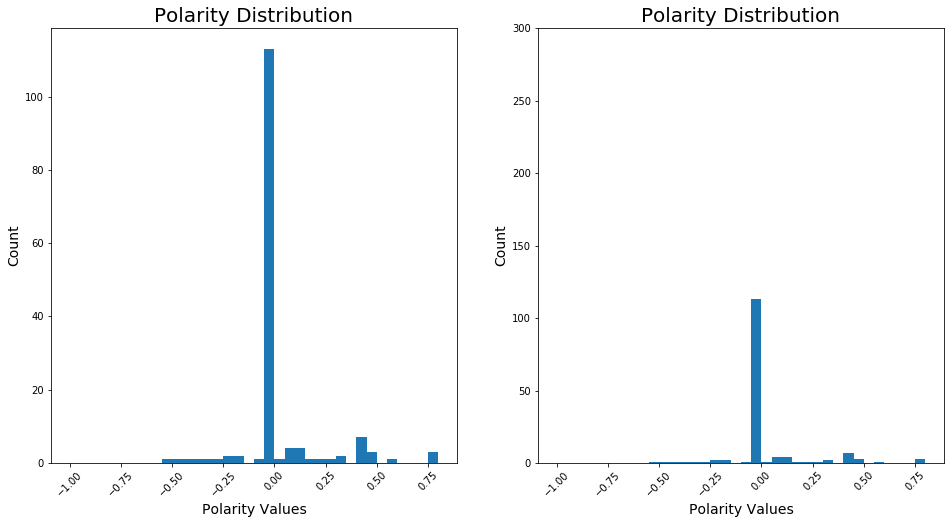

In [25]:
# Show the distribution of polarity of the tweets 
fig = plt.figure(figsize = [16, 8])

ax1 = plt.subplot(1,2,1)
bin_edges = np.arange(-1, df_tweets_clean['Polarity'].max()+ 0.05, 0.05)
plt.hist(data = df_tweets_clean, x ='Polarity', bins = bin_edges)

plt.xticks(rotation = 45)
plt.ylabel('Count', fontsize = 14)
plt.xlabel('Polarity Values', fontsize = 14)
plt.title( 'Polarity Distribution', fontsize = 20)

# Zoom in version of the plot
ax2 = plt.subplot(1,2,2)
bin_edges = np.arange(-1, df_tweets_clean['Polarity'].max()+ 0.05, 0.05)
plt.hist(data = df_tweets_clean, x ='Polarity', bins = bin_edges)

plt.xticks(rotation = 45)
plt.ylabel('Count', fontsize = 14)
plt.xlabel('Polarity Values', fontsize = 14)
plt.title( 'Polarity Distribution', fontsize = 20)
ax2.set_ylim(0, 300)

plt.show();

> As show in the distribution most tweets gather around 0 (neutral point). This could mostly be attributed to the way the algorithm quantifies the polarity of each tweets. It would be convenient to further polish the algorithm in order to increase realiability of results. For the sake of simplicity, I'll leave it as it is for now.
> Given those results there also seems to be quite a split in terms of opinions. There are very positive and very negative tweets covering the whole spectrum. As it could've been expected given the amount of media coverage that Tesla receives every day and the amount of short sellers manipulating market conditions. Fanboys and haters alike have their portions on the above graph.

In [26]:
data = df_tweets_clean[['Polarity', 'Sentiment']]
data = pd.melt(data,id_vars="Sentiment",
                    value_vars= 'Polarity',
              value_name = 'value')
data.head()

,Sentiment,variable,value
0,Neutral,Polarity,0.000000
1,Neutral,Polarity,0.000000
2,Neutral,Polarity,0.000000
3,Neutral,Polarity,0.000000
4,Positive,Polarity,0.433333


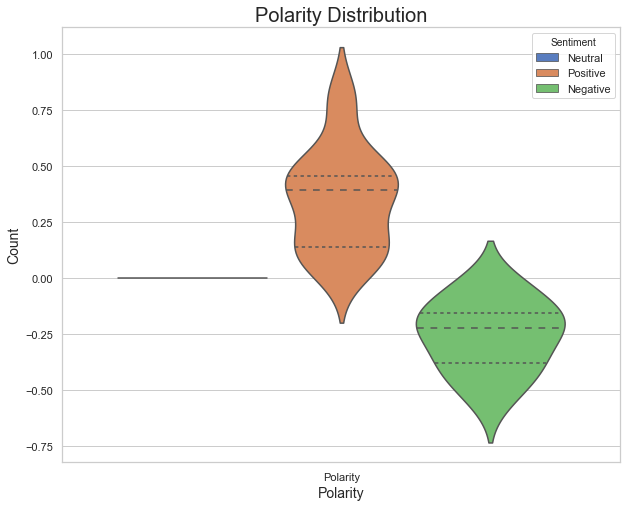

In [27]:
# I'll explore one extra visualization this time regarding 'Sentiment' column. I'll use a swarmplot for this matter.
color = sns.set(style="whitegrid", palette="muted")

fig = plt.figure(figsize = [10, 8])

sns.violinplot(data = data, x = 'variable', y = 'value', hue = 'Sentiment', inner = 'quart')
plt.ylabel('Count', fontsize = 14)
plt.xlabel('Polarity', fontsize = 14)
plt.title( 'Polarity Distribution', fontsize = 20)

plt.show();

> The median for positive comments is slightly higher than for negative ones, as depicted by the violinplot. In both cases, the majority of polarities remain within the interval **[0.5, -0,5]**.

> As mentioned before, there is a huge amount of neutral comments that deserver further exploration and in terms of algorithm refinement.

### 5) MAP VISUALIZATION

> Below code snippet shows an alternative way to display tweets in a map. However, I could not be able to solve an error related to a pyproj file (CRS) so I finally opted for an alternative way using folium.

In [28]:
##import os
#os.environ["PROJ_LIB"] = r"C:\Users\dario\Anaconda3\pkgs\proj4-5.2.0-ha925a31_1\Library\share"; #fixr
#from mpl_toolkits.basemap import Basemap

# Declare map projection, size and resolution
#fig = plt.figure(figsize = [10, 14])

# Define title fot map
#plt.title('Snapshot of Tesla Tweets around globe', fontsize = 20)

# Declar map projection, size and resolution
#map = Basemap(projection = 'merc',
 ##            llcrnrlat = -80,
   #          urcrnrlat = 80,
    #         llcrnrlon = -180,
     #        urcrnrlon = 180,
      #       lat_ts = 20,
       #      resolution = 'l')
#map.shadedrelief(scale = 1)

# Map coordinates into map
#g = sns.FacetGrid(data = df_tweets_clean, hue = 'Sentiment', size = 4)
#g.map(map.plot, df_tweets_clean['latitude'], df_tweets_clean['longitude'])
#g.add_legend()

#plt.show();

In [29]:
import folium
from folium.plugins import FastMarkerCluster

map1 = folium.Map(
    location=[59.338315,18.089960],
    tiles='cartodbpositron',
    zoom_start=2,
)

# Erase null coordinates from dataframe
df_tweets_clean = df_tweets_clean[pd.notnull(df_tweets_clean['latitude'])]

# Mark each point/coordinate with a marker and add to map. Finally, show final plot
df_tweets_clean.apply(lambda row:folium.Marker(location=[row["latitude"], row["longitude"]], 
                                                icon=folium.Icon(color='lightblue', icon = "fa-twitter", prefix = 'fa')).add_to(map1) 
                                if row['Sentiment'] == 'Positive'
                                else folium.Marker(location=[row["latitude"], row["longitude"]], 
                                                icon=folium.Icon(color='red', icon = "fa-twitter", prefix = 'fa')).add_to(map1) 
                                if row['Sentiment'] == 'Negative'
                                else folium.Marker(location=[row["latitude"], row["longitude"]], 
                                                icon=folium.Icon(color='gray', icon = "fa-twitter", prefix = 'fa')).add_to(map1)
                                , axis=1)
map1
# Blue = Positive Tweet; Red = Negative Tweet; Gray = Neutral Tweet

> Since geolocation and coordinates for all tweets were *deactivated when streaming*, specific coordinates had to be converted from the user location field. Since this is not a specific geo-location, multiple tweets will inevitably share the same coordinates. So, the amount of tweets display in the map is lower than those recorded in the dataframe. 
> Anyway, it serves to show a quick and dirty overview of the current global sentiment ocurring around Tesla for a specific timeframe (duration of streaming).